In [7]:
import numpy as np
import pandas as pd

import sys
sys.path.append("..")
from config import args

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.linear_model import LogisticRegression

# from miwae import miwae
# from metrics import tau_dr, tau_ols, tau_ols_ps
# from generate_data import gen_lrmf, ampute, gen_dlvm
l_tau = ['tau_dr', 'tau_ols', 'tau_ols_ps', 'mul_tau_dr', 'mul_tau_ols', 'mul_tau_ols_ps']

In [8]:
from baseline import *

## Choose metric and data model

In [9]:
loss = 'tau_ols'
model = 'dlvm'

save_plots = True

## Load data

In [10]:
df_mice = load_results('2019-10-24_exp_mi.csv')
df_mice['algo'] = 'mice'
df_mice = df_mice[['model','n','p','prop_miss','seed','method','citcio','tau_dr', 'tau_ols', 'tau_ols_ps',
                       '|1-tau_dr|', '|1-tau_ols|','|1-tau_ols_ps|', 'algo']]

df_mice_all = df_mice.copy()
df_mice.head()

results.shape (480, 20)


,model,n,p,prop_miss,seed,method,citcio,tau_dr,tau_ols,tau_ols_ps,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,5,0.1,0,glm,False,1.097757,1.096392,1.097914,0.097757,0.096392,0.097914,mice
1,dlvm,1000,100,0.1,0,glm,False,1.044572,1.043477,1.045678,0.044572,0.043477,0.045678,mice
2,dlvm,5000,5,0.1,0,glm,False,1.071130,1.073666,1.080702,0.071130,0.073666,0.080702,mice
3,dlvm,5000,100,0.1,0,glm,False,1.085659,1.075437,1.077248,0.085659,0.075437,0.077248,mice
4,dlvm,1000,5,0.3,0,glm,False,1.089423,1.089637,1.090258,0.089423,0.089637,0.090258,mice


In [13]:
df = load_results('exp_29.1_10_small.csv_temp')

df_ = load_results('exp_04.1_11_small.csv_temp')
df_ = df_[list(set(df_.columns) -set(['res_tau_resid','mul_res_tau_resid', 'm']))]

df = pd.concat((df,df_))

#df = load_results('exp_15.2_10_choux_temp.csv')
#df['citcio'] = False
#df['dcor_zhat'] = np.nan
#df['dcor_zhat_mul'] = np.nan
#df['add_wy'] = False
df.loc[df['algo']=='miwae_','algo'] = 'MDC.process' 


# columns = df.columns.tolist()
# columns_reduced = list(set(columns) - set(['mul_tau_dr','mul_tau_ols','mul_tau_ols_ps']))

df_ = df.copy()
df_['algo'] = 'MDC.mi'
df_['tau_dr'] = df_['mul_tau_dr']
df_['tau_ols'] = df_['mul_tau_ols']
df_['tau_ols_ps'] = df_['mul_tau_ols_ps']
df_['|1-tau_dr|'] = abs(1-df_['mul_tau_dr'])
df_['|1-tau_ols|'] = abs(1-df_['mul_tau_ols'])
df_['|1-tau_ols_ps|'] = abs(1-df_['mul_tau_ols_ps'])

#tt = list(set(df_.columns[:list(df_.columns).index('mul_tau_dr')]))
tt = ['model', 'n', 'd','p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps']
tt.extend(list(['|1-tau_dr|','|1-tau_ols|','|1-tau_ols_ps|','dcor_zhat','dcor_zhat_mul','algo']))

df_ = df_[tt]

df = df[tt]

df = pd.concat([df, df_])

df = df[list(['model','n', 'd', 'p', 'prop_miss', 'seed', 'd_miwae', 'n_epochs', 'sig_prior', 
              'method', 'time', 'citcio', 'add_wy', 
              'tau_dr', 'tau_ols', 'tau_ols_ps', 
              'dcor_zhat', 'dcor_zhat_mul', '|1-tau_dr|', '|1-tau_ols|', '|1-tau_ols_ps|', 'algo'])]
#df.columns.tolist()

df_all = df.copy()
df_all.head()

results.shape (374, 24)
results.shape (534, 27)


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,model,n,d,p,prop_miss,seed,d_miwae,n_epochs,sig_prior,method,...,add_wy,tau_dr,tau_ols,tau_ols_ps,dcor_zhat,dcor_zhat_mul,|1-tau_dr|,|1-tau_ols|,|1-tau_ols_ps|,algo
0,dlvm,1000,3,5,0.1,0,3,10,0.1,glm,...,True,1.081424,1.081779,1.081908,0.499922,0.119565,0.081424,0.081779,0.081908,MDC.process
1,dlvm,1000,3,100,0.1,0,3,10,0.1,glm,...,True,1.001166,1.001854,0.999689,0.706796,0.663552,0.001166,0.001854,0.000311,MDC.process
2,dlvm,1000,3,5,0.3,0,3,10,0.1,glm,...,True,1.103148,1.103060,1.109032,0.412992,0.105296,0.103148,0.103060,0.109032,MDC.process
3,dlvm,1000,3,100,0.3,0,3,10,0.1,glm,...,True,0.994866,0.993980,0.995914,0.690837,0.595437,0.005134,0.006020,0.004086,MDC.process
4,dlvm,1000,3,5,0.0,0,3,10,0.1,glm,...,True,1.077038,1.076966,1.074978,0.525174,0.127417,0.077038,0.076966,0.074978,MDC.process


In [70]:
#best_params, df_best = get_best_params(df, loss = loss)

In [14]:
df = df_all.loc[df_all['model']==model]
df_mice = df_mice_all.loc[df_mice_all['model']==model]

## Small prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 400, 'method': 'glm', 'p': 5, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0, 'd_miwae': 3, 'add_wy': False, 'd': 3}
best_params= {'n_epochs': 400, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0, 'd_miwae': 3, 'add_wy': False, 'd': 3}
{'method': 'glm', 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0}
['glm', 1000, False, 'dlvm', 0.0]
p : 5
MDC.process: mean  tau_ols : 1.061236686279439 std:  0.0151273986193698
MDC.mi: mean  tau_ols : 1.024226547648345 std:  0.013699677746464302
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.063143991808147 std:  0.011462706019998848
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0631439918081467 std:  0.011462706019998757
p : 100
MDC.process: mean  tau_ols : 1.0481165027525776 std:  0.0073371017429739215
MDC.mi: mean  tau_ols 

TypeError: 'Legend' object is not iterable

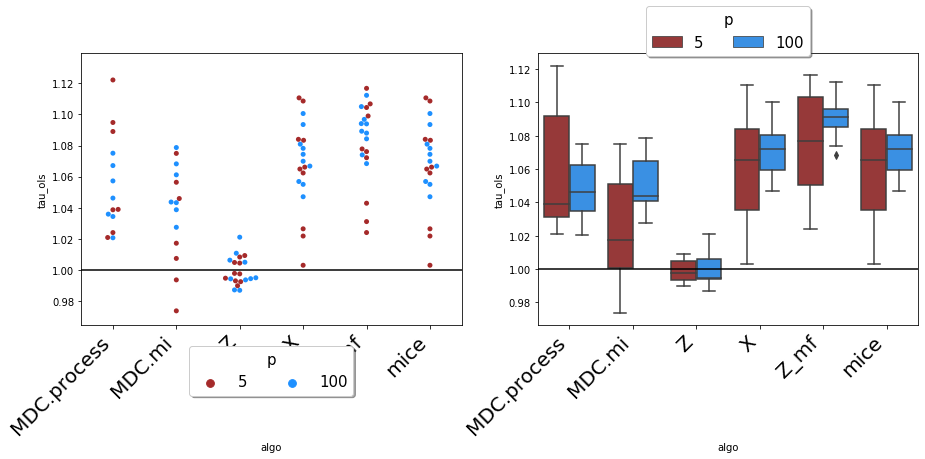

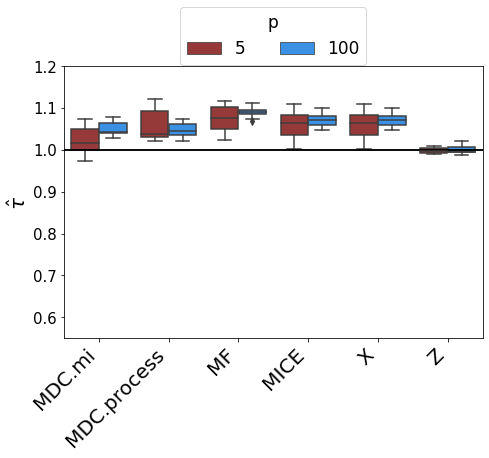

In [16]:
sig_prior = 0.1
n_epochs = 400
n = 1000
add_wy = False
citcio = False
full_baseline = True
for prop_miss in [0, 0.1, 0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf', save_prefix = '../figures/',ylim = [0.55, 1.2])
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                          hue = 'p', palette=['brown','dodgerblue'])

## Medium prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 10, 'prop_miss': 0.0, 'add_wy': False, 'd_miwae': 3, 'p': 5, 'citcio': False, 'n': 1000, 'method': 'glm', 'd': 3, 'model': 'dlvm', 'sig_prior': 1.0}
best_params= {'n_epochs': 10, 'prop_miss': 0.0, 'add_wy': False, 'd_miwae': 3, 'p': 100, 'citcio': False, 'n': 1000, 'method': 'glm', 'd': 3, 'model': 'dlvm', 'sig_prior': 1.0}
p : 5
MDC.process: mean  tau_dr : 1.0191689735157765 std:  0.01933308943687709
MDC.mi: mean  tau_dr : 1.0244202450433064 std:  0.016162698678598788
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0631885566079002 std:  0.008442188843452362
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0631885566079002 std:  0.012266216010298432
p : 100
MDC.process: mean  tau_dr : 1.0732999415494533 std:  0.014572849130926498
MDC.mi: mean  tau_dr : 1.0572518277329228 std:  0.013346925621313446
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: 

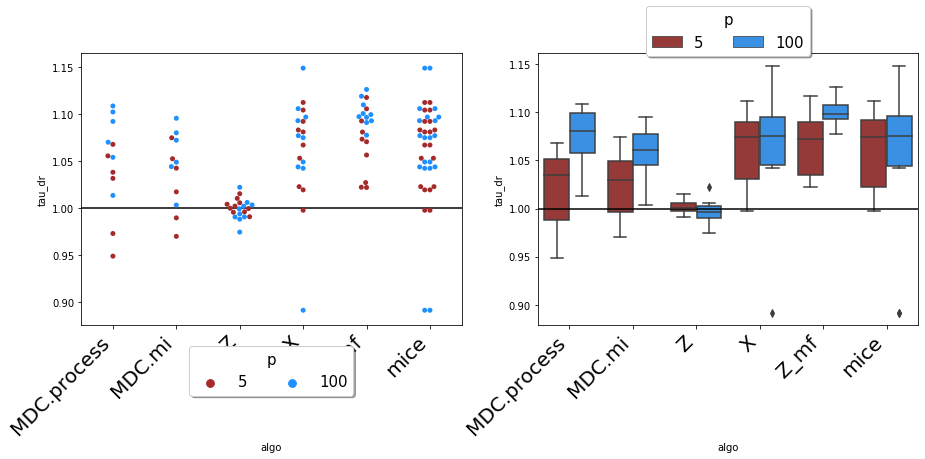

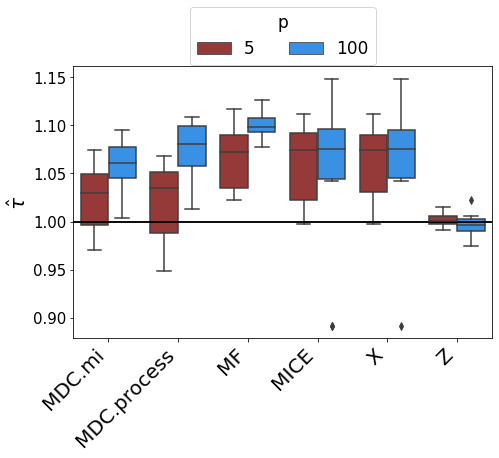

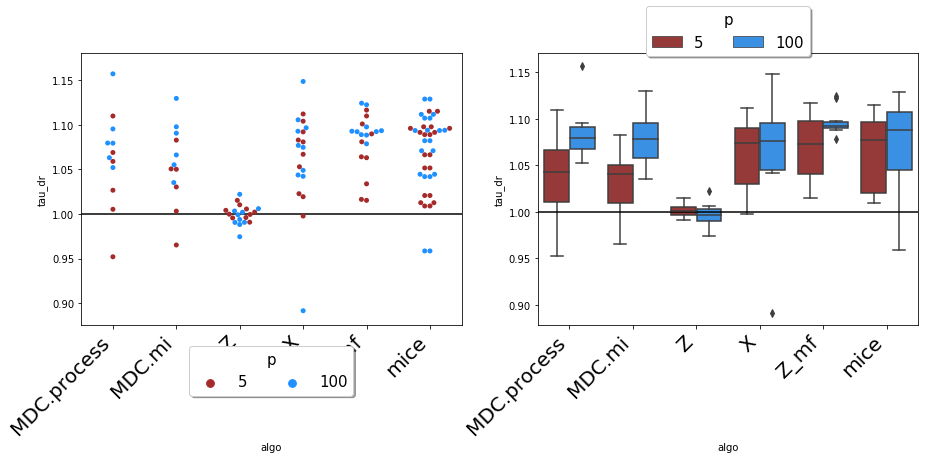

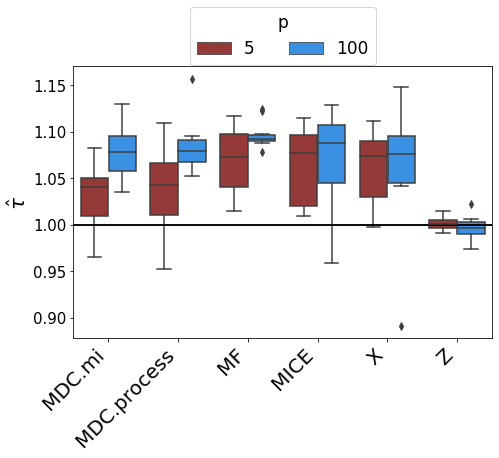

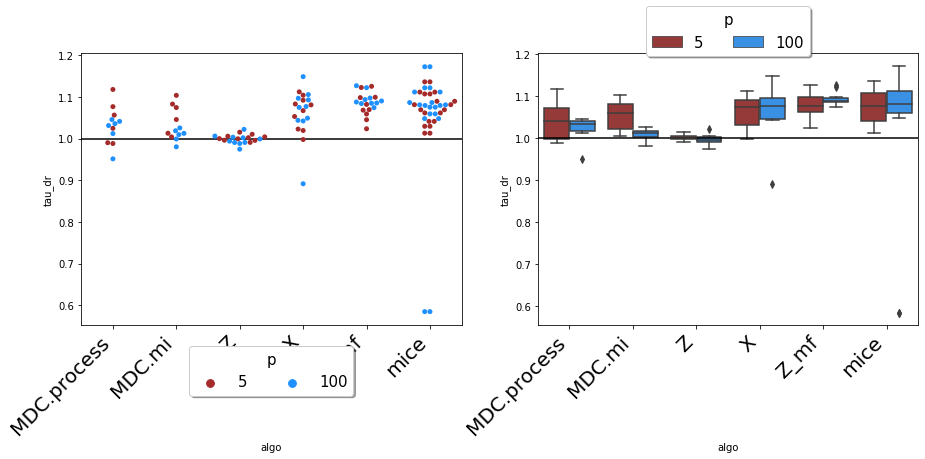

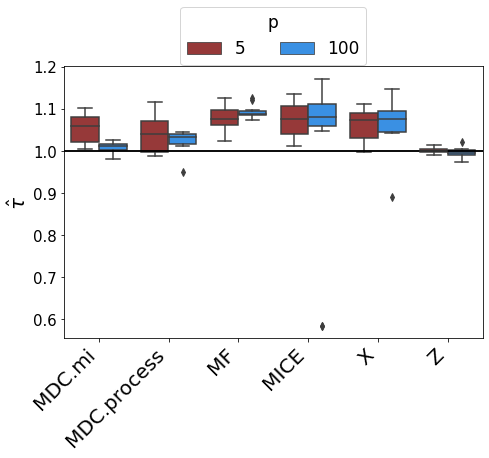

In [87]:
sig_prior = 1
n_epochs = 10
n = 1000
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                              df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                          df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                          hue = 'p', palette=['brown','dodgerblue'])


## Large prior variance

Proportion of missing values: 0
best_params= {'n_epochs': 400, 'prop_miss': 0.0, 'add_wy': False, 'd_miwae': 3, 'p': 5, 'citcio': False, 'n': 1000, 'method': 'glm', 'd': 3, 'model': 'dlvm', 'sig_prior': 10.0}
best_params= {'n_epochs': 400, 'prop_miss': 0.0, 'add_wy': False, 'd_miwae': 3, 'p': 100, 'citcio': False, 'n': 1000, 'method': 'glm', 'd': 3, 'model': 'dlvm', 'sig_prior': 10.0}
p : 5
MDC.process: mean  tau_dr : 1.0611351928599555 std:  0.01627084184382588
MDC.mi: mean  tau_dr : 1.0447119781464558 std:  0.01520798339176391
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mice: mean  tau_dr : 1.0631885566079002 std:  0.008442188843452362
mean_imp: mean  tau_dr : nan std:  nan
full: mean  tau_dr : 1.0631885566079002 std:  0.012266216010298432
p : 100
MDC.process: mean  tau_dr : 1.0646559622441876 std:  0.0060968073173621054
MDC.mi: mean  tau_dr : 1.0652116809336858 std:  0.005975471702195702
MF: mean  tau_dr : nan std:  nan
cevae: mean  tau_dr : nan std:  nan
mi

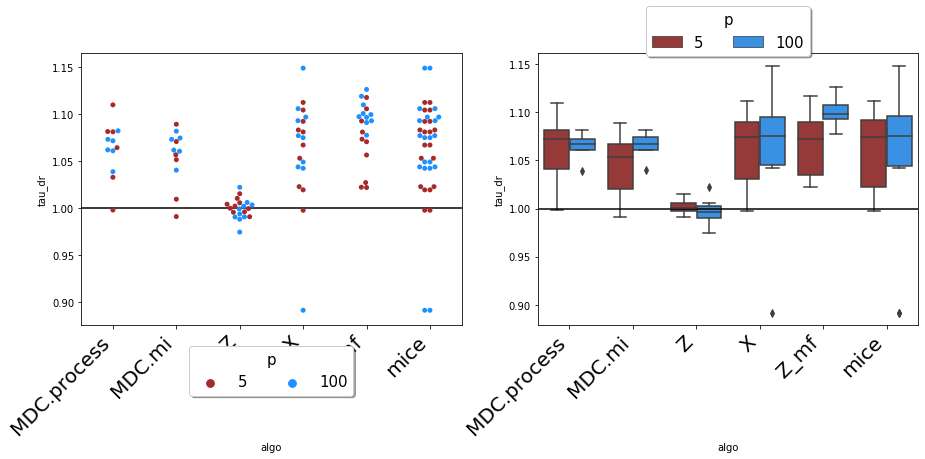

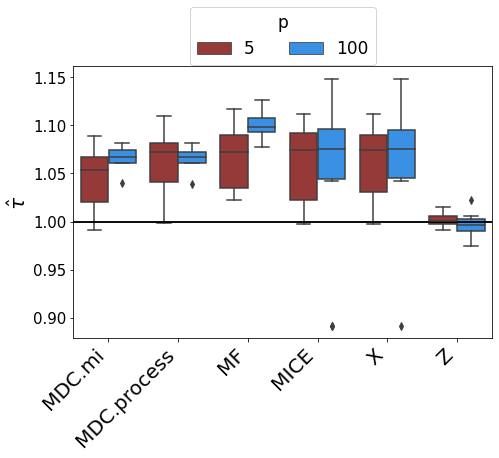

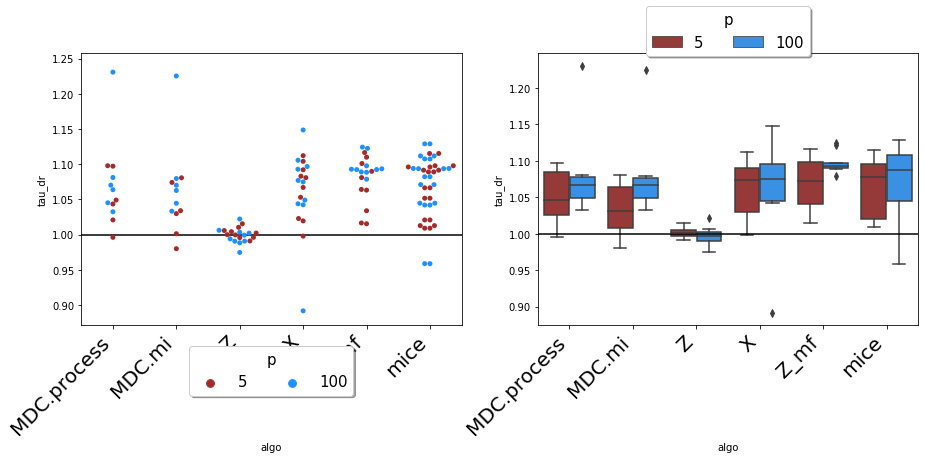

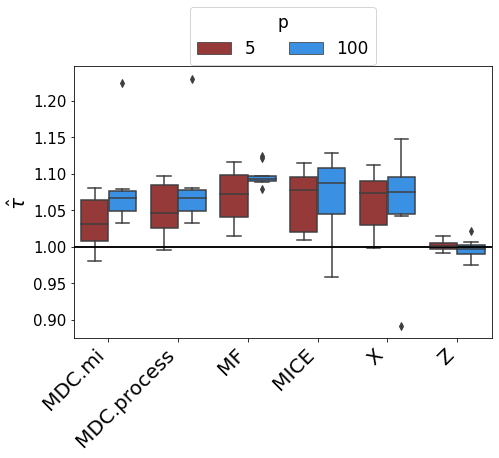

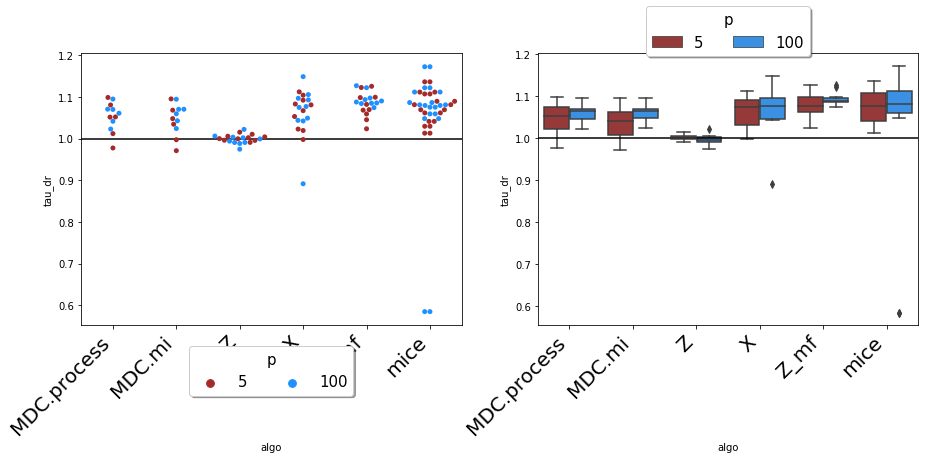

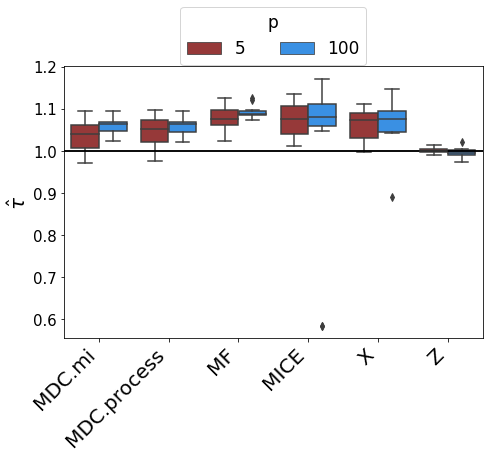

In [88]:
sig_prior = 10
n_epochs = 400
n = 1000
add_wy = False
citcio = False
for prop_miss in [0,0.1,0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                              df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                              hue = 'p', palette=['brown','dodgerblue'], save_plot = 'varyingP.pdf')
    else:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)], 
                          df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                          hue = 'p', palette=['brown','dodgerblue'])


## Number of epochs

Proportion of missing values: 0.1
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
223

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
223

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 100, 'n_epochs': 400, 'n': 1000}
    model     n    p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
181  lrmf  1000  100        0.1     0    glm   False  0.977685  0.999794   
187  lrmf  1000  100        0.1     1    glm   False  0.997127  0.993682   
193  lrmf  1000  100        0.1     2    glm   False  0.985843  1.007623   
199  lrmf  1000  100        0.1     3    glm   False  1.021522  1.022713   
205  lrmf  1000  100        0.1     4    glm   False  0.985727  0.997716   
211  lrmf  1000  100        0.1     5    glm   False  0.982312  1.003073   
217  lrmf  1000  100        0.1     6    glm   False  0.949432  0.998486   
2

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


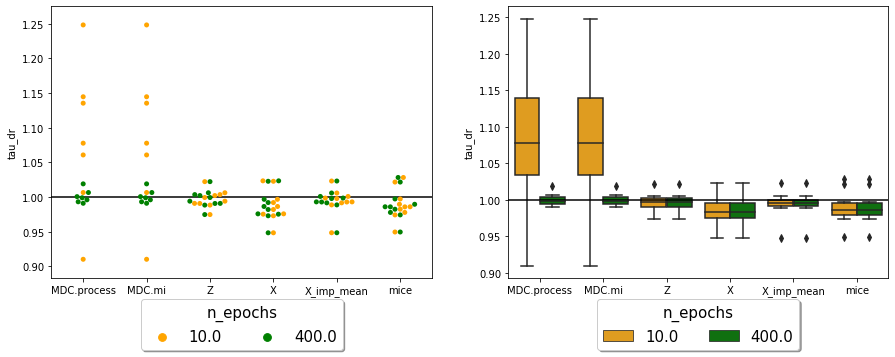

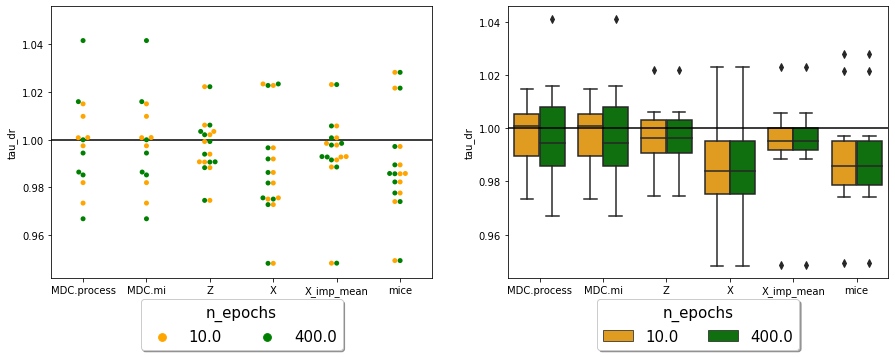

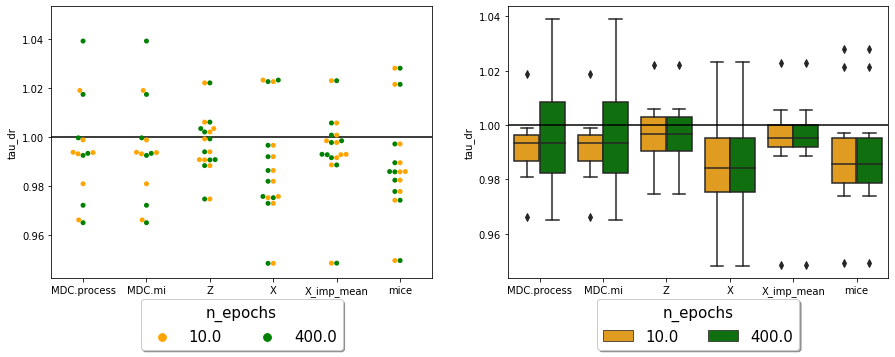

In [817]:
prop_miss = 0.1
p = 100
for sig_prior in [0.1, 1, 10]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] ==p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])


Proportion of missing values: 0.1
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 0.1, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5     

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 1.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5     

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


Proportion of missing values: 0.1
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 10, 'n': 1000}
best_params= {'sig_prior': 10.0, 'citcio': False, 'prop_miss': 0.1, 'd_miwae': 3, 'model': 'lrmf', 'method': 'glm', 'd': 3, 'add_wy': False, 'p': 5, 'n_epochs': 400, 'n': 1000}
    model     n  p  prop_miss  seed method  citcio    tau_dr   tau_ols  \
180  lrmf  1000  5        0.1     0    glm   False  0.886267  0.883639   
186  lrmf  1000  5        0.1     1    glm   False  0.860388  0.870988   
192  lrmf  1000  5        0.1     2    glm   False  0.917789  0.907634   
198  lrmf  1000  5        0.1     3    glm   False  0.820113  0.830055   
204  lrmf  1000  5        0.1     4    glm   False  0.844855  0.842745   
210  lrmf  1000  5        0.1     5    glm   False  0.849483  0.861423   
216  lrmf  1000  5        0.1     6    glm   False  0.865897  0.880311   
222  lrmf  1000  5   

/Users/imke_mayer/Documents/TraumaMatrix/CausalInference/Simulations/miss-vae/baseline.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tt[hue] = param_hue


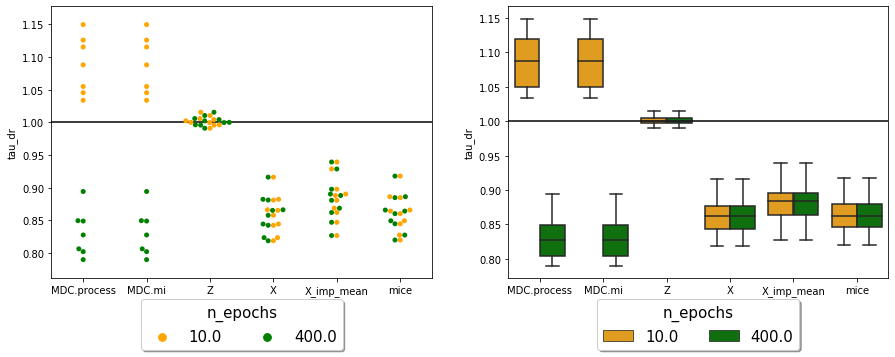

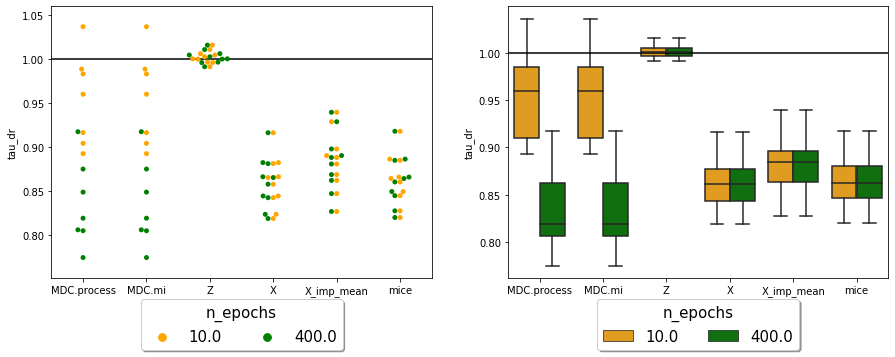

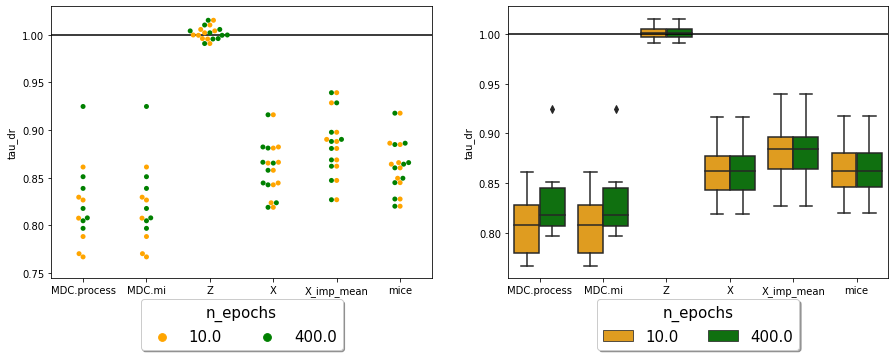

In [816]:
prop_miss = 0.1
p = 5
for sig_prior in [0.1, 1, 10]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] == p)], 
                              df_mice_results = df_mice, loss = loss,
                              hue = 'n_epochs', palette=['orange','green'], save_plot = 'varyingN_epochs.pdf')
    else: 
        boxplot_with_baseline(df.loc[(df['n'] == n) & (df['add_wy'] == False) & (df['citcio'] == False) & (df['prop_miss']==0.1) & (df['sig_prior']==sig_prior) & (df['p'] ==p)], 
                          df_mice_results = df_mice, loss = loss,
                          hue = 'n_epochs', palette=['orange','green'])

## Plots for iclr v3 (appendix)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Proportion of missing values: 0
best_params= {'n_epochs': 400, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0, 'd_miwae': 3, 'add_wy': False, 'd': 3}
{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0}
['glm', 100, 1000, False, 'dlvm', 0.0]
MDC.process: mean  tau_ols : 1.0481165027525776 std:  0.0073371017429739215
MDC.mi: mean  tau_ols : 1.051625503958746 std:  0.006866615549863978
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.005338377884293727
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
Proportion of missing values: 0.1
best_params= {'n_epochs': 400, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.1, 'd_miwae': 3, 'add_wy': False, 'd': 3}
-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_

No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.1}
['glm', 100, 1000, False, 'dlvm', 0.1]
MDC.process: mean  tau_ols : 1.0518720148168677 std:  0.006561431417452562
MDC.mi: mean  tau_ols : 1.0530923891114885 std:  0.006119912102018903
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0739246114837353 std:  0.006015877821238006
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
Proportion of missing values: 0.3
best_params= {'n_epochs': 400, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.3, 'd_miwae': 3, 'add_wy': False, 'd': 3}
-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9494892685528568


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9512873106761272


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9587492805575795


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.96513824224164


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9483437954637838


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9639242204081935


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9448641511943799


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9443604081022438


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9475436444165357


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


-get_U_softimpute, best_rank= 4
-get_U_softimpute, best_mae= 0.9601115403471351


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.3}
['glm', 100, 1000, False, 'dlvm', 0.3]
MDC.process: mean  tau_ols : 1.04872493398827 std:  0.009042436097631393
MDC.mi: mean  tau_ols : 1.0505653197643896 std:  0.008396007162190628
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.004646684335754479
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655


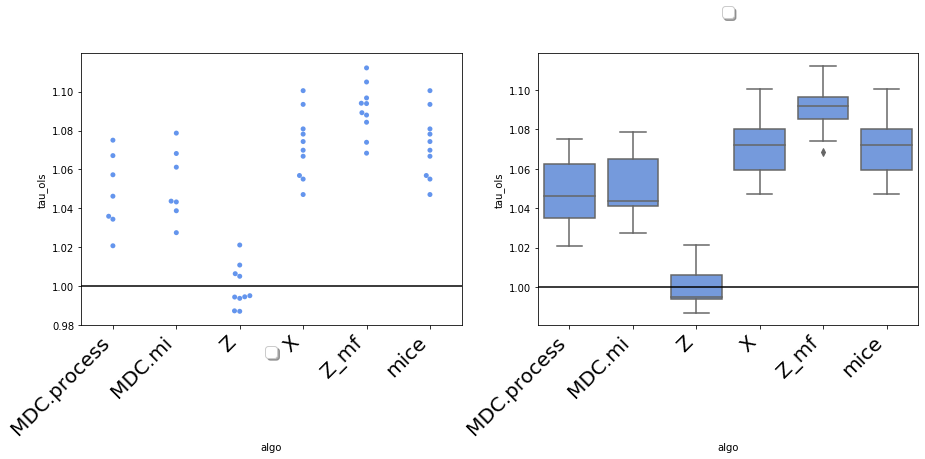

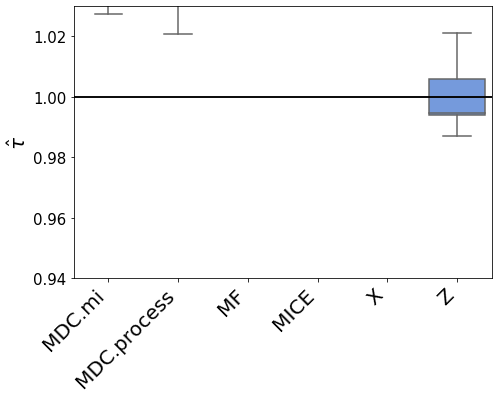

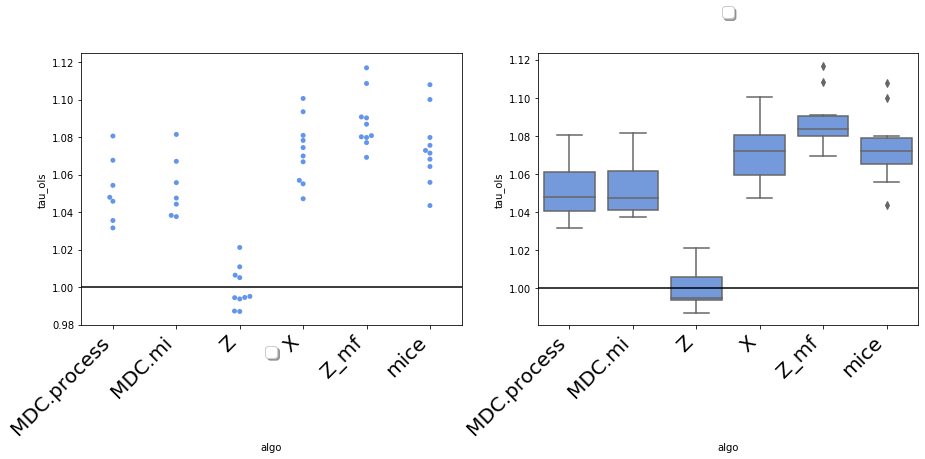

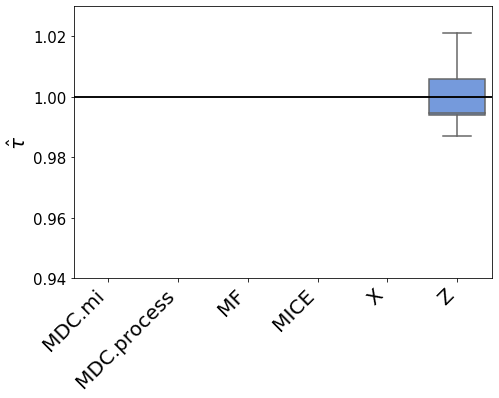

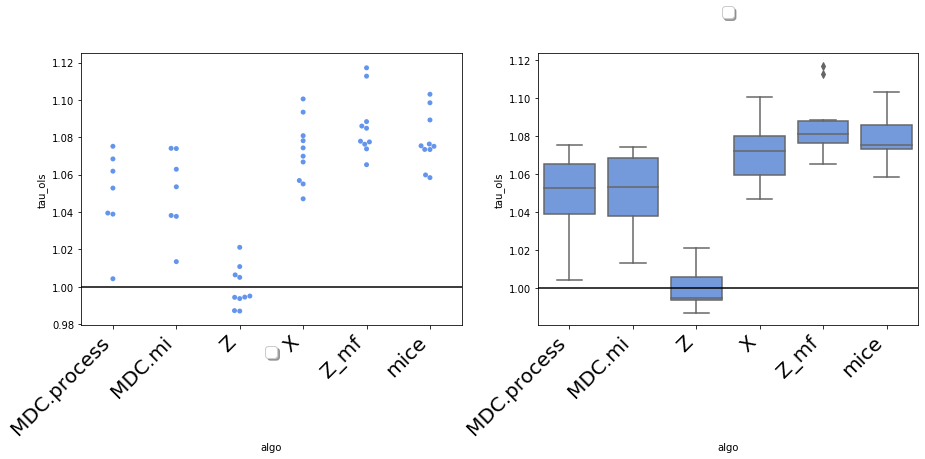

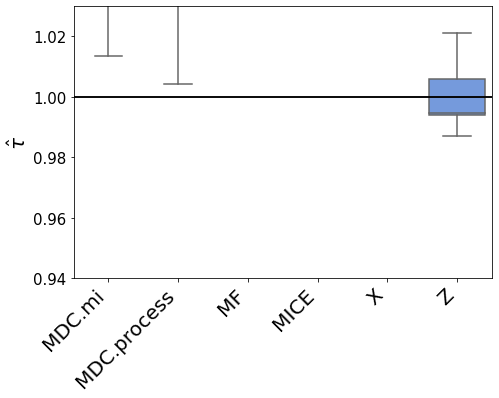

In [18]:
sig_prior = 0.1
n_epochs = 400
n = 1000
p=100
add_wy = False
citcio = False
full_baseline = True
for prop_miss in [0, 0.1, 0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                                  df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                                  palette=['cornflowerblue'], save_plot = 'p100.pdf', save_prefix = '../figures/iclr/', ylim = [0.94,1.03])
    else:
        boxplot_with_baseline(df.loc[(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                                  df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                                  palette=['cornflowerblue'])

Proportion of missing values: 0
best_params= {'n_epochs': 10, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0, 'd_miwae': 3, 'add_wy': False, 'd': 3}


No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.0}
['glm', 100, 1000, False, 'dlvm', 0.0]
MDC.process: mean  tau_ols : 1.0051450160430326 std:  0.010458104140048436
MDC.mi: mean  tau_ols : nan std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.072326240989787 std:  0.005338377884293727
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
Proportion of missing values: 0.1
best_params= {'n_epochs': 10, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.1, 'd_miwae': 3, 'add_wy': False, 'd': 3}


No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.1}
['glm', 100, 1000, False, 'dlvm', 0.1]
MDC.process: mean  tau_ols : 0.9974884402306632 std:  0.008107167424306954
MDC.mi: mean  tau_ols : nan std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0739246114837353 std:  0.006015877821238006
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655
Proportion of missing values: 0.3
best_params= {'n_epochs': 10, 'method': 'glm', 'p': 100, 'sig_prior': 0.1, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.3, 'd_miwae': 3, 'add_wy': False, 'd': 3}


/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/imke_mayer/anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", Convergenc

{'method': 'glm', 'p': 100, 'n': 1000, 'citcio': False, 'model': 'dlvm', 'prop_miss': 0.3}
['glm', 100, 1000, False, 'dlvm', 0.3]
MDC.process: mean  tau_ols : 0.9918537824985736 std:  0.01010136043191842
MDC.mi: mean  tau_ols : nan std:  nan
MF: mean  tau_ols : nan std:  nan
cevae: mean  tau_ols : nan std:  nan
mice: mean  tau_ols : 1.0783296654885874 std:  0.004646684335754479
mean_imp: mean  tau_ols : nan std:  nan
full: mean  tau_ols : 1.0723262409897862 std:  0.0053383778842935655


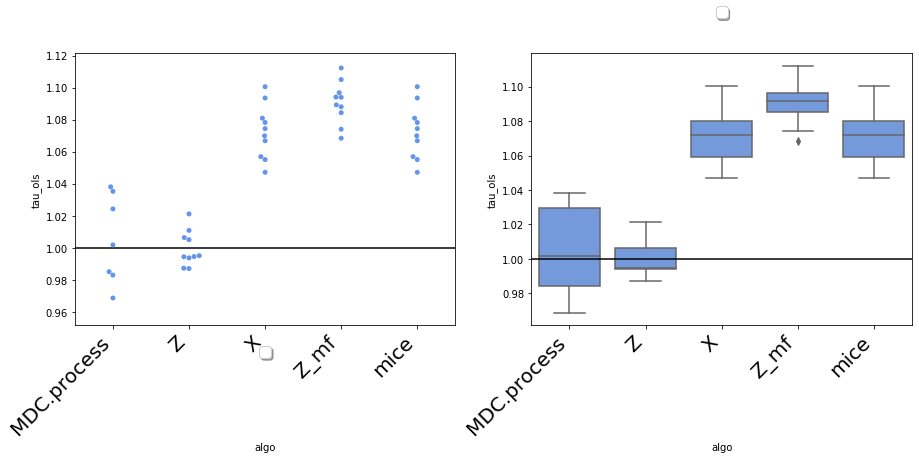

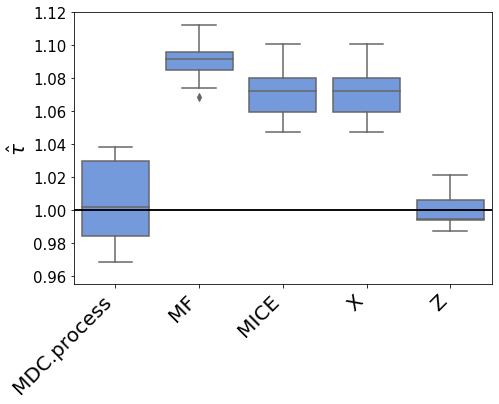

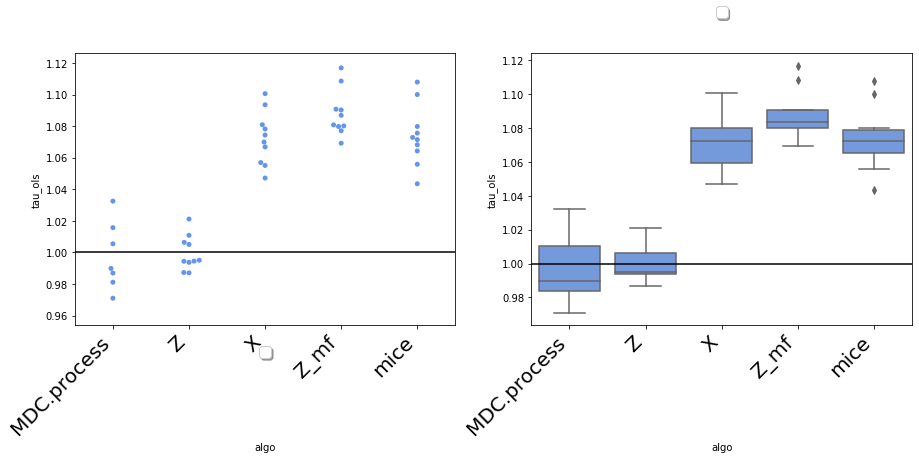

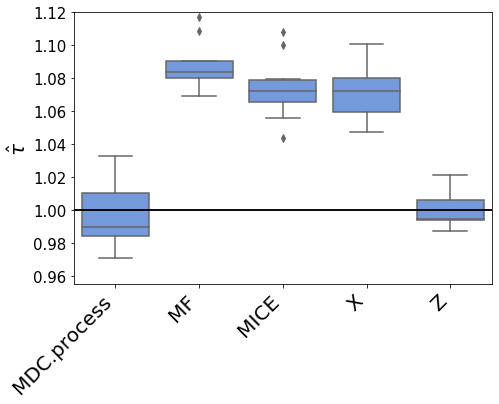

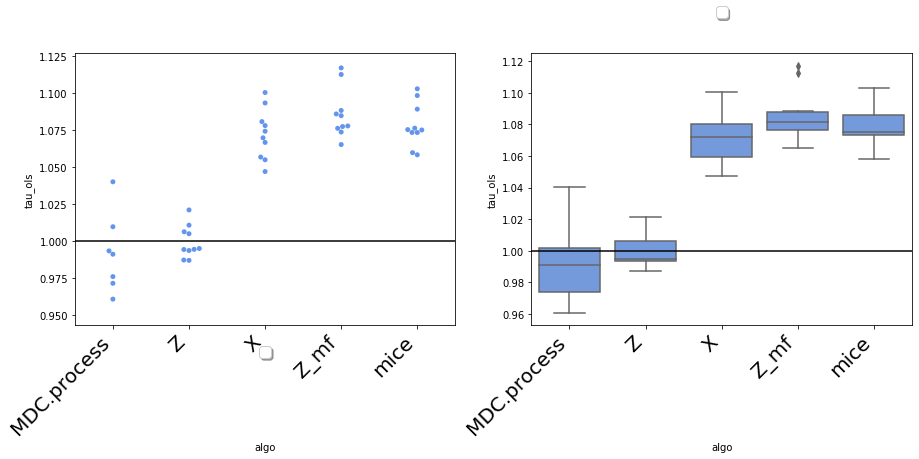

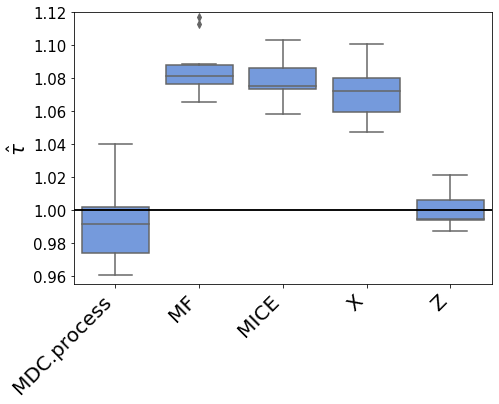

In [19]:
# Regression (without MDC.mi)
sig_prior = 0.1
n_epochs = 10
n = 1000
p=100
add_wy = False
citcio = False
full_baseline = True
for prop_miss in [0, 0.1, 0.3]:
    print('Proportion of missing values:',prop_miss)
    if save_plots:
        boxplot_with_baseline(df.loc[(df['algo'] == 'MDC.process') & (df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                                  df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                                  palette=['cornflowerblue'], save_plot = 'p100.pdf', save_prefix = '../figures/iclr/', ylim = [0.955,1.12])
    else:
        boxplot_with_baseline(df.loc[(df['algo'] == 'MDC.process') &(df['p'] == p) & (df['n'] == n) & (df['add_wy'] == add_wy) & (df['citcio'] == citcio) & (df['n_epochs'] == n_epochs) & (df['sig_prior']==sig_prior) & (df['prop_miss'] == prop_miss)],
                                  df_mice_results = df_mice, loss = loss, full_baseline = full_baseline,
                                  palette=['cornflowerblue'])